<a href="https://colab.research.google.com/github/AunImran/Data-Science-CCP/blob/main/CCPDSFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_name = "/content/max_planck_weather_ts.csv"
data = pd.read_csv(file_name)

# Display the first few rows to understand the data
print(data.head())


             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [3]:
# Convert "Date Time" column to datetime format
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Check for duplicates and remove them
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates().reset_index(drop=True)

# Replace -9999.0 with NaN in specific columns
columns_with_outliers = ['wv (m/s)', 'max. wv (m/s)']
for col in columns_with_outliers:
    data.loc[:, col] = data[col].replace(-9999.0, np.nan)

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values (e.g., fill with mean or forward-fill)
for col in columns_with_outliers:
    data.loc[:, col] = data[col].fillna(data[col].mean())

Number of duplicate rows: 0
Missing values per column:
Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


                           Date Time       p (mbar)       T (degC)  \
count                         420224  420224.000000  420224.000000   
mean   2012-12-30 09:17:41.471024640     989.214157       9.442421   
min              2009-01-01 00:10:00     913.600000     -23.010000   
25%              2010-12-31 13:47:30     984.200000       3.360000   
50%              2012-12-30 03:05:00     989.580000       9.400000   
75%              2014-12-30 08:32:30     994.730000      15.460000   
max              2017-01-01 00:00:00    1015.350000      37.280000   
std                              NaN       8.360888       8.421135   

            Tpot (K)    Tdew (degC)         rh (%)   VPmax (mbar)  \
count  420224.000000  420224.000000  420224.000000  420224.000000   
mean      283.484880       4.953472      76.028738      13.568642   
min       250.600000     -25.010000      12.950000       0.950000   
25%       277.430000       0.230000      65.240000       7.770000   
50%       283.460000    

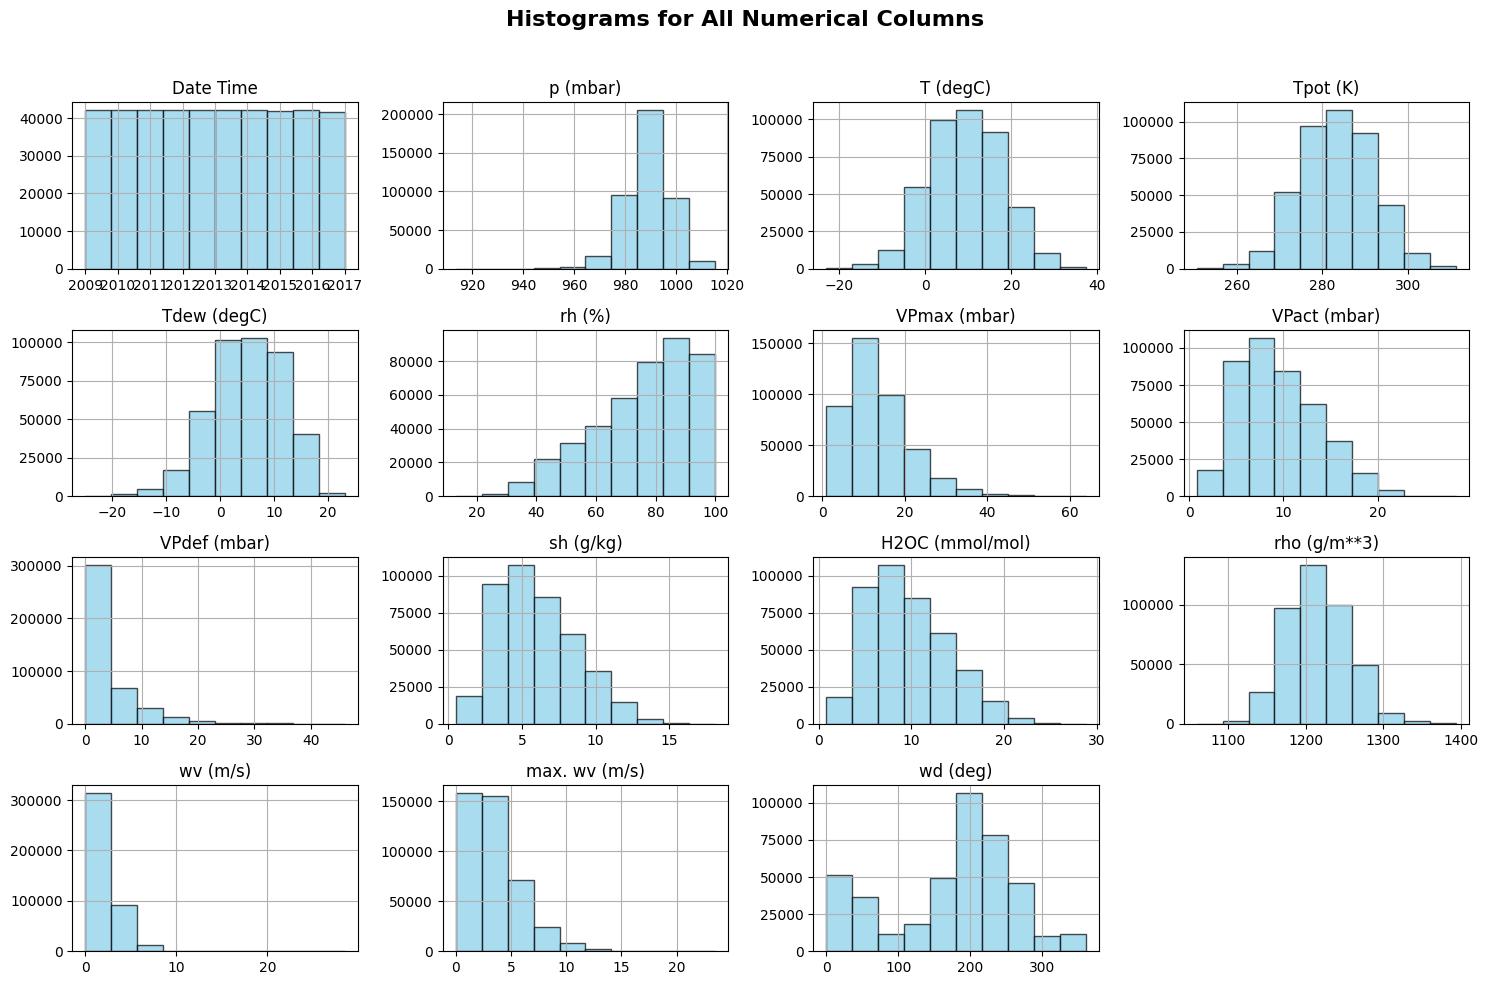

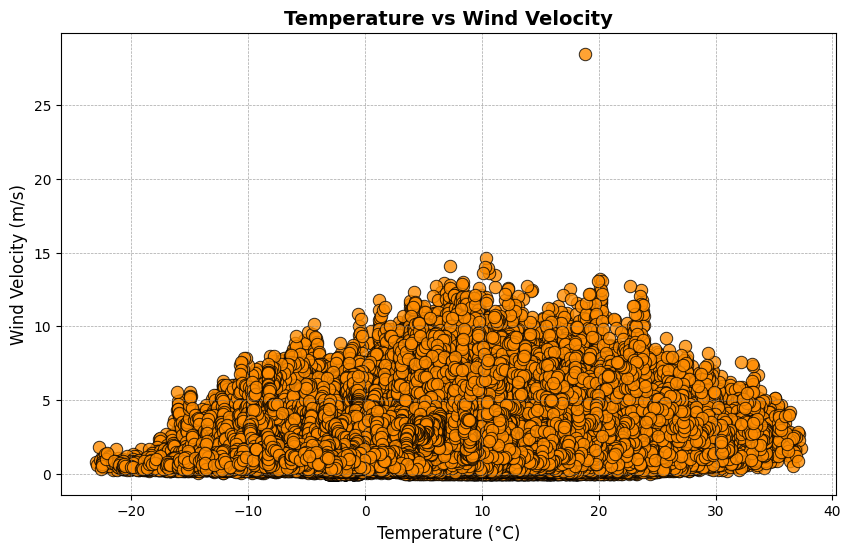

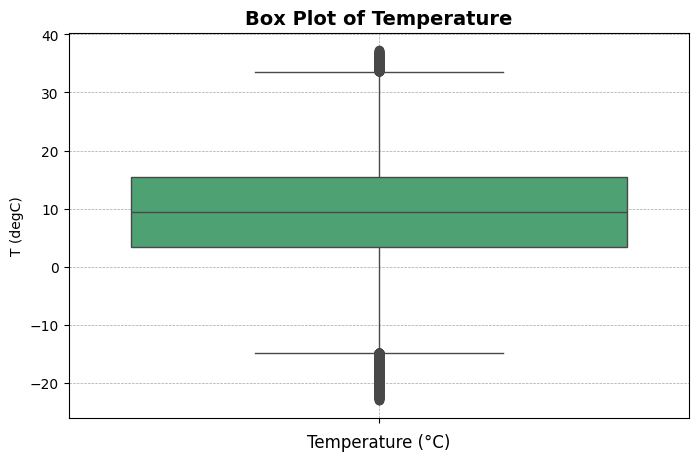

In [4]:
# Summary statistics
print(data.describe())

# Histograms for all numerical columns with custom color and style
data.hist(figsize=(15, 10), color='skyblue', edgecolor='black', alpha=0.7)
plt.suptitle('Histograms for All Numerical Columns', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

# Scatter plot for wind velocity vs. temperature with customized colors
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='T (degC)',
    y='wv (m/s)',
    data=data,
    color='darkorange',
    edgecolor='black',
    s=80,  # Marker size
    alpha=0.8  # Transparency
)
plt.title('Temperature vs Wind Velocity', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Wind Velocity (m/s)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add gridlines
plt.show()

# Box plot to identify outliers in temperature with a stylish palette
plt.figure(figsize=(8, 5))
sns.boxplot(data['T (degC)'], color='mediumseagreen', saturation=0.7)
plt.title('Box Plot of Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add gridlines
plt.show()


In [5]:
# Extract time-based features
data['Hour'] = data['Date Time'].dt.hour
data['Month'] = data['Date Time'].dt.month
data['Day'] = data['Date Time'].dt.day

# Normalize or standardize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['T (degC)', 'Tdew (degC)', 'wv (m/s)', 'max. wv (m/s)']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the updated dataset
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Hour,Month,Day
0,2009-01-01 00:10:00,996.52,-2.073645,265.40,-2.058110,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,-0.713578,-0.761725,152.3,0,1,1
1,2009-01-01 00:20:00,996.57,-2.119957,265.01,-2.114564,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,-0.914801,-0.868652,136.1,0,1,1
2,2009-01-01 00:30:00,996.53,-2.131832,264.91,-2.119020,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,-1.258828,-1.240759,171.6,0,1,1
3,2009-01-01 00:40:00,996.51,-2.108082,265.12,-2.083365,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,-1.161462,-1.296361,198.0,0,1,1
4,2009-01-01 00:50:00,996.51,-2.103332,265.15,-2.078909,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,-1.174444,-1.240759,214.3,0,1,1


Model Coefficients: [ 0.11664775  0.0056745  -0.01763973  0.0025271   0.00041402  0.00155177]
Model Intercept: -33.08276390435326
     Actual  Predicted
0 -0.710406  -0.628907
1  1.159890   1.167755
2  1.429450   1.426882
3  0.731206   0.756957
4  1.523262   1.476633
5 -0.592845  -0.407525
6 -1.472775  -1.579458
7  0.733581   0.777022
8  0.550708   0.531896
9 -0.504971  -0.606269
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.08
R-squared (R²): 0.99


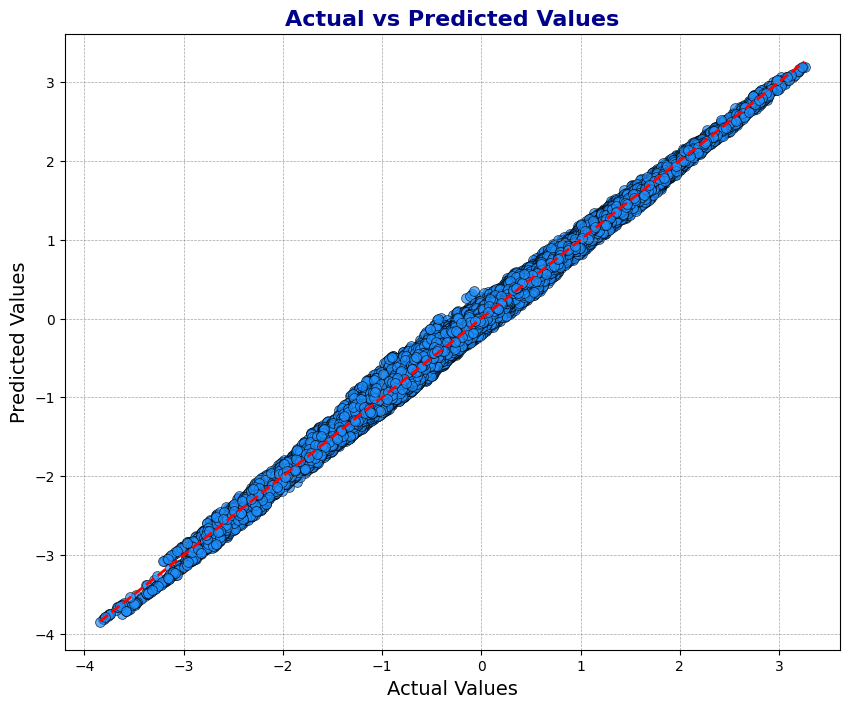

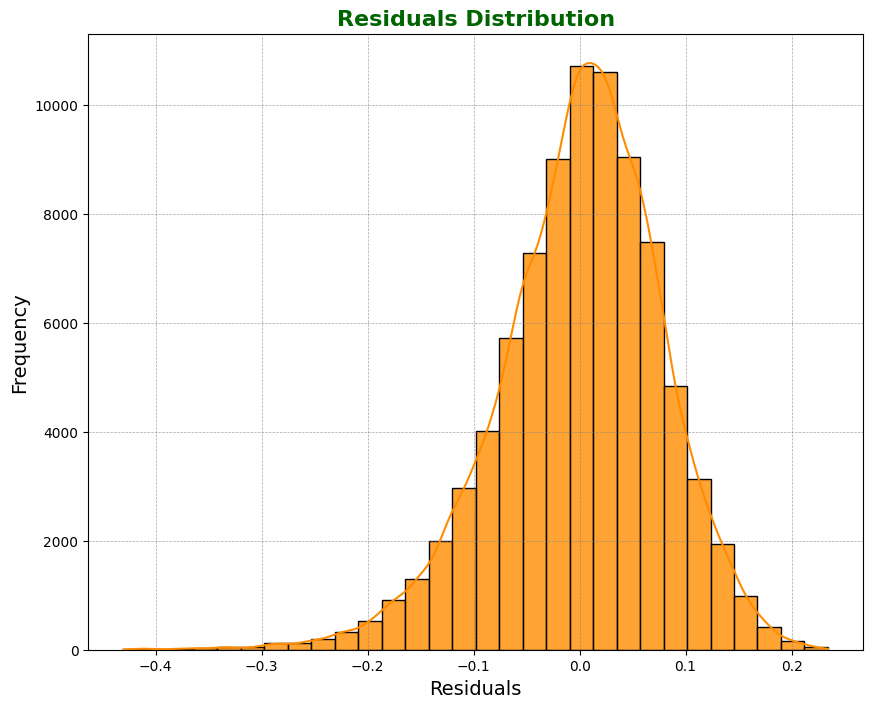

Model saved as 'linear_regression_model.pkl'.


In [8]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

#Defining Features and Target Variable
X = data[['Tpot (K)', 'Tdew (degC)', 'wv (m/s)', 'max. wv (m/s)', 'Hour', 'Month']]
y = data['T (degC)']

#Spliting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Making Predictions
y_pred = model.predict(X_test)

# Display the first 10 predicted and actual values
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head(10))

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing Results
# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', s=50, alpha=0.7, edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
sns.histplot(residuals, kde=True, bins=30, color='darkorange', edgecolor='black', alpha=0.8)
plt.title('Residuals Distribution', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Save the Model
import joblib

# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'.")

# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')
